In [1]:
import numpy as np
import pandas as pd
import webbrowser

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

from tensorflow import keras
from keras.models import load_model,Sequential
from keras.preprocessing.image import ImageDataGenerator as Imgen
from keras.preprocessing import image
from keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout

from PIL import Image
from sklearn.metrics import classification_report,confusion_matrix

import os
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from keras.applications.densenet import DenseNet201

import splitfolders

from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
import cv2



In [ ]:
splitfolders.ratio(r"D:\Desktop\flowers",output="Tr-Te-Val",ratio=(0.8,0.1,0.1))

Copying files: 4317 files [00:05, 859.23 files/s]


In [ ]:
#Tải hình ảnh bằng ImageDataGenerator

In [3]:
train_gen = Imgen(preprocessing_function=keras.applications.densenet.preprocess_input,
                 zoom_range=0.2,
                  shear_range=0.2,
                  vertical_flip=True,
                  width_shift_range=0.2,
                  height_shift_range=0.2,
                  fill_mode='nearest'
                 )

val_gen = Imgen(preprocessing_function=keras.applications.densenet.preprocess_input,
                 zoom_range=0.2,
                  shear_range=0.2,
                  vertical_flip=True,
                  width_shift_range=0.2,
                  height_shift_range=0.2,
                  fill_mode='nearest'
                 )

test_gen = Imgen(preprocessing_function=keras.applications.densenet.preprocess_input
                 )

In [4]:
train_ds = train_gen.flow_from_directory("./Tr-Te-Val/train",
                                       target_size=(224,224),
                                        seed = 123,
                                        batch_size=32
                                       )

val_ds = val_gen.flow_from_directory("./Tr-Te-Val/val",
                                       target_size=(224,224),
                                        seed = 123,
                                        batch_size=32)

test_ds = test_gen.flow_from_directory("./Tr-Te-Val/test",
                                       target_size=(224,224),
                                        seed = 123,
                                        batch_size=32,
                                      shuffle=False
                                      )

Found 3452 images belonging to 5 classes.
Found 430 images belonging to 5 classes.
Found 435 images belonging to 5 classes.


In [5]:
a = train_ds.class_indices
classes = list(a.keys())
classes

['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']

In [ ]:
# Xây dựng mô hình CNN cơ bản để phân loại hình ảnh

In [6]:
X,Y = next(train_ds)

In [7]:
def plot_images(img,labels):
    plt.figure(figsize=(15,10))
    for i in range(25):
        plt.subplot(5,5,i+1)
        plt.imshow(img[i])
        plt.title(classes[np.argmax(labels[i])])
        plt.axis('off')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

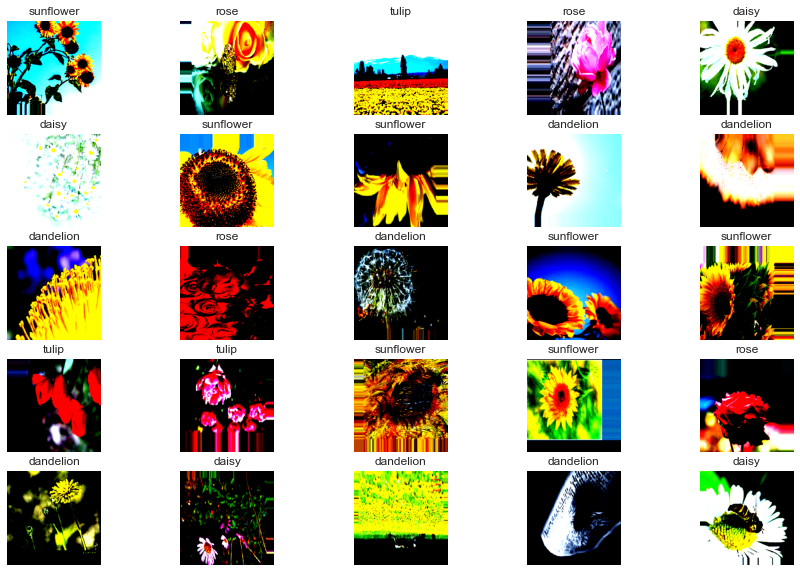

In [8]:
plot_images(X,Y)

In [9]:
base_model = DenseNet201(include_top=False,
                  input_shape=(224,224,3),
                   weights = 'imagenet',
                    pooling='avg'
                  )
base_model.trainable = False

In [ ]:
inputs = base_model.input
l1 = Dense(128,activation='relu')(base_model.output)
outputs = Dense(5,activation='softmax')(l1)
model = keras.Model(inputs=inputs,outputs=outputs)

In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
hist = model.fit(train_ds,epochs=18,validation_data=val_ds)

Epoch 1/18
108/108 [==============================] - 410s 4s/step - loss: 0.1256 - accuracy: 0.9525 - val_loss: 0.3980 - val_accuracy: 0.9000
Epoch 2/18
108/108 [==============================] - 459s 4s/step - loss: 0.1045 - accuracy: 0.9644 - val_loss: 0.2678 - val_accuracy: 0.9093
Epoch 3/18
108/108 [==============================] - 423s 4s/step - loss: 0.1131 - accuracy: 0.9574 - val_loss: 0.3099 - val_accuracy: 0.9023
Epoch 4/18
108/108 [==============================] - 447s 4s/step - loss: 0.0878 - accuracy: 0.9684 - val_loss: 0.3562 - val_accuracy: 0.8907
Epoch 5/18
108/108 [==============================] - 411s 4s/step - loss: 0.1052 - accuracy: 0.9592 - val_loss: 0.3119 - val_accuracy: 0.9023
Epoch 6/18
108/108 [==============================] - 402s 4s/step - loss: 0.0956 - accuracy: 0.9667 - val_loss: 0.3560 - val_accuracy: 0.8791
Epoch 7/18
108/108 [==============================] - 419s 4s/step - loss: 0.0970 - accuracy: 0.9638 - val_loss: 0.2847 - val_accuracy: 0.9047

In [ ]:
model.save("Model2.h5")

In [10]:
model = load_model("./Model2.h5")

In [11]:
model.evaluate(test_ds)

14/14 [==============================] - 66s 4s/step - loss: 0.4252 - accuracy: 0.9011


[0.4251871109008789, 0.9011494517326355]

In [29]:
preds = model.predict(test_ds,verbose=1)

14/14 [==============================] - 66s 4s/step


In [ ]:
pred = [np.argmax(i) for i in preds]
pred[:5]

[1, 0, 0, 4, 0]

In [ ]:
actual = test_ds.classes

In [ ]:
print(classification_report(pred,actual))

              precision    recall  f1-score   support

           0       0.88      0.93      0.91        73
           1       0.90      0.94      0.92       101
           2       0.95      0.84      0.89        89
           3       0.97      0.87      0.92        83
           4       0.83      0.92      0.87        89

    accuracy                           0.90       435
   macro avg       0.91      0.90      0.90       435
weighted avg       0.91      0.90      0.90       435



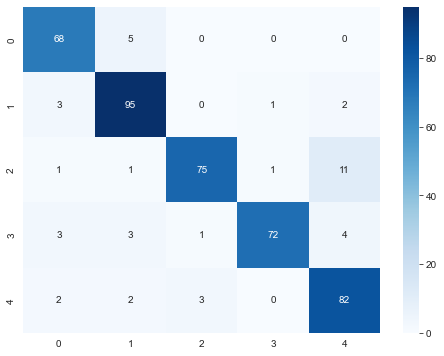

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(pred,actual),annot = True, fmt = 'd', cmap = 'Blues');

In [ ]:
#Phân tích đánh giá để đưa ra kết quả

In [12]:
def predict_img(path):
    img = keras.preprocessing.image.load_img(path,target_size=(224,224))
    img_arr = keras.preprocessing.image.img_to_array(img)
    img_arr_expnd  = np.expand_dims(img_arr,axis=0)
    img = keras.applications.densenet.preprocess_input(img_arr_expnd)
    
    pred = model.predict(img)
    result = classes[np.argmax(pred)]
    
    return result

In [13]:
def get_link(link):
    flower = str(predict_img(link))
    url = "file:///D:/Desktop/AIP/trong%20hoa/" + flower +".html"
    return url


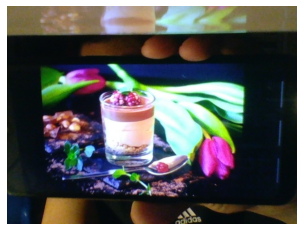

In [50]:
cap = cv2.VideoCapture(0)

while True:
    success, img = cap.read()
    cv2.imshow("webcam", img)
    if cv2.waitKey(1) == ord('q'):
        break
cv2.imwrite("1.jpg",img)
cv2.waitKey(0)
plt.imshow(Image.open("1.jpg"))
plt.axis('off');

In [14]:
print("The given image belongs to class:",predict_img("1.jpg"))

1/1 [==============================] - 3s 3s/step
The given image belongs to class: tulip


In [15]:
new = 2
webbrowser.open(get_link("1.jpg"),new=new)

1/1 [==============================] - 0s 166ms/step


True